# 4.1 - Data Cleaning 2


![cleaning2](images/data_cleaning_cycle.avif)

# Ejemplo 1 - Airbnb data


En esta limpieza nos centraremos en tres conceptos:

+ Valores nulos.
+ Datos inconsistentes 
+ Valores atípicos (Outliers)

Primero importamos librerias y los datos.

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')

# pa pintar
import pylab as plt  # import matplotlib.pyplot as plt
import seaborn as sns

# para que salga el grafica
%matplotlib inline

In [3]:
# se cargan los datos

airbnb_ori = pd.read_csv('../data/AB_NYC_2019.csv')

airbnb =  airbnb_ori.copy()

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Exploración Inicial**

Se comienza la exploracion de los datos.

In [4]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# del punto pa la izq damelo todo(:), del punto pa la dcha solo 2 decimales


airbnb.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
id,48895.00,19017143.24,10983108.39,2539.00,9471945.00,19677284.00,29152178.50,36487245.00
host_id,48895.00,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,107434423.00,274321313.00
latitude,48895.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,48895.00,-73.95,0.05,-74.24,-73.98,-73.96,-73.94,-73.71
price,48895.00,152.72,240.15,0.00,69.00,106.00,175.00,10000.00
minimum_nights,48895.00,7.03,20.51,1.00,1.00,3.00,5.00,1250.00
number_of_reviews,48895.00,23.27,44.55,0.00,1.00,5.00,24.00,629.00
reviews_per_month,38843.00,1.37,1.68,0.01,0.19,0.72,2.02,58.50
calculated_host_listings_count,48895.00,7.14,32.95,1.00,1.00,1.00,2.00,327.00
availability_365,48895.00,112.78,131.62,0.00,0.00,45.00,227.00,365.00


In [6]:
airbnb.describe(include='object').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


**Columnas numericas**

In [7]:
num_df = airbnb.select_dtypes(exclude='object')

num_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
airbnb._get_numeric_data().head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


**Columnas categoricas**

In [9]:
cat_df = airbnb.select_dtypes(exclude=['int', 'float'])

cat_df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


## Valores Nulos

In [10]:
airbnb.shape

(48895, 16)

In [11]:
nan_cols = airbnb.isna().sum()

nan_cols[nan_cols>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [12]:
nan_cols = airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

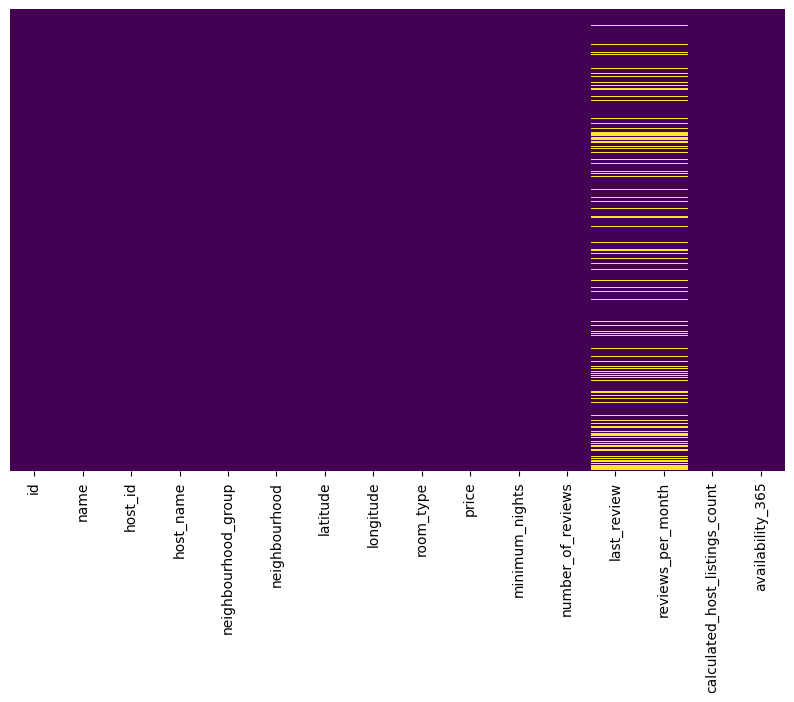

In [13]:
# grafico de nulos en el dataframe

#inicializa la figura
plt.figure(figsize=(10, 6))  # 100X60  pixeles


sns.heatmap(airbnb.isna(),       # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',      # mapa de color
            cbar=False           # sin barra lateral
           )

plt.show();

In [14]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

'N nan cols: 4'

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

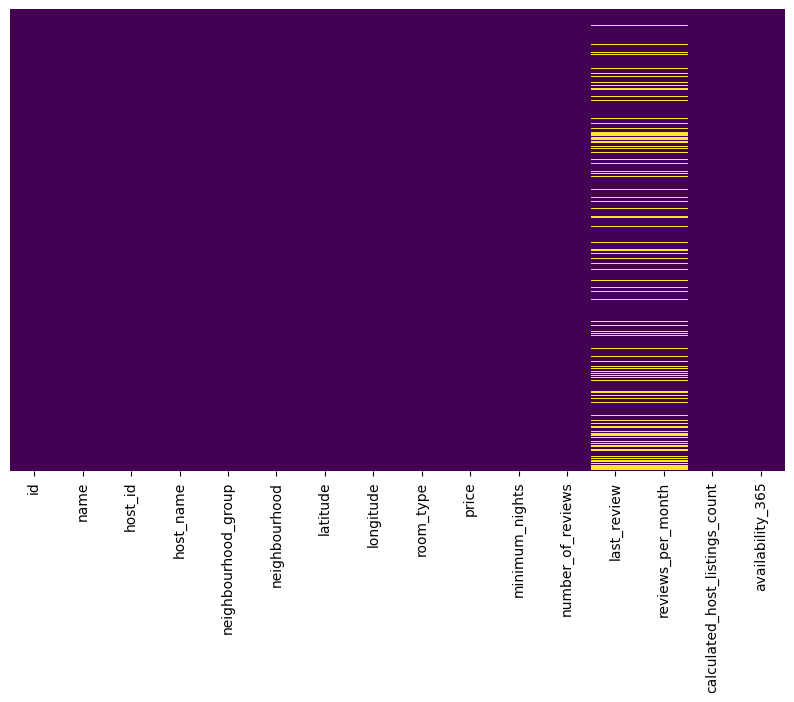

In [15]:
check_nan(airbnb)

**¿Qué hacemos con estos valores?**

In [16]:
# borrar columnas

cols = ['id', 'host_id']

airbnb.drop(columns=cols, inplace=True)

In [17]:
airbnb.duplicated().any()

False

In [18]:
airbnb['price'].min(), airbnb['price'].mean(), airbnb['price'].max()

(0, 152.7206871868289, 10000)

In [19]:
airbnb[airbnb.price==0].shape

(11, 14)

In [20]:
airbnb[airbnb.price==10000]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


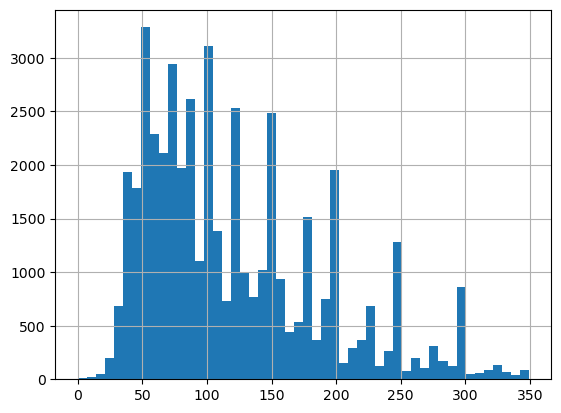

In [21]:
airbnb[airbnb.price<350].price.hist(bins=50);

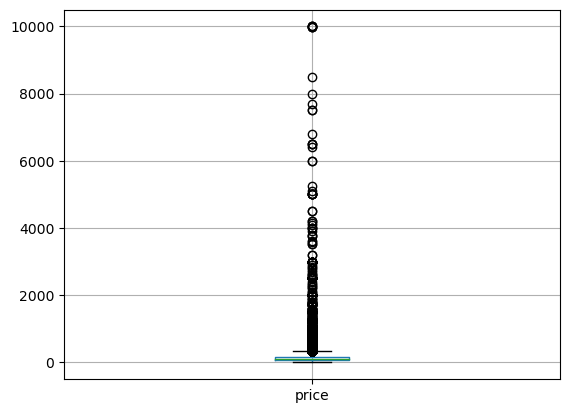

In [22]:
airbnb[['price']].boxplot();

In [23]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
airbnb = airbnb[(airbnb.price>50) & (airbnb.price<350)]

In [25]:
airbnb.shape

(39497, 14)

In [26]:
airbnb_ori.shape

(48895, 16)

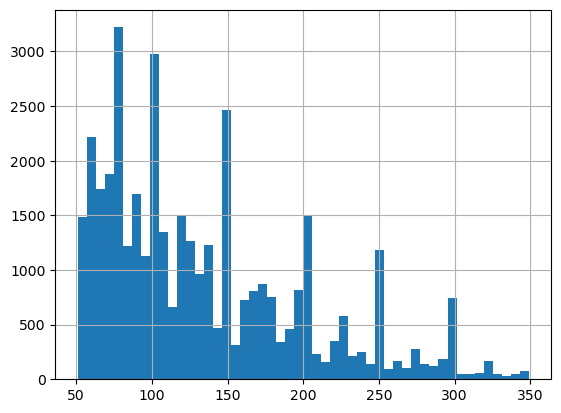

In [27]:
airbnb.price.hist(bins=50);

In [28]:
airbnb.price.describe()

count    39497.000000
mean       133.705167
std         66.036012
min         51.000000
25%         80.000000
50%        119.000000
75%        175.000000
max        349.000000
Name: price, dtype: float64

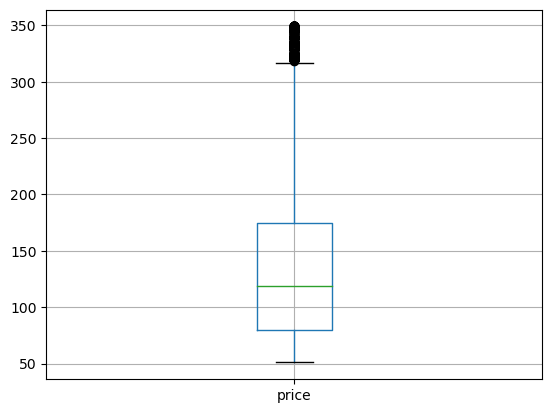

In [29]:
airbnb[['price']].boxplot();

'N nan cols: 4'

name                  0.030382
host_name             0.040509
last_review          19.411601
reviews_per_month    19.411601
dtype: float64

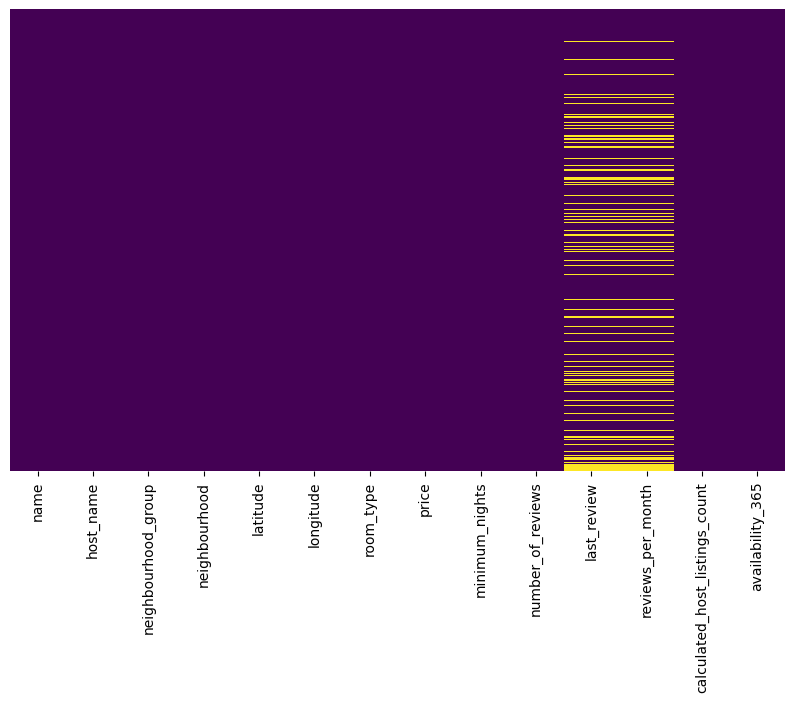

In [30]:
check_nan(airbnb)

In [31]:
# rellenar reviews con 0

airbnb.reviews_per_month.fillna(0., inplace=True)

'N nan cols: 3'

name            0.030382
host_name       0.040509
last_review    19.411601
dtype: float64

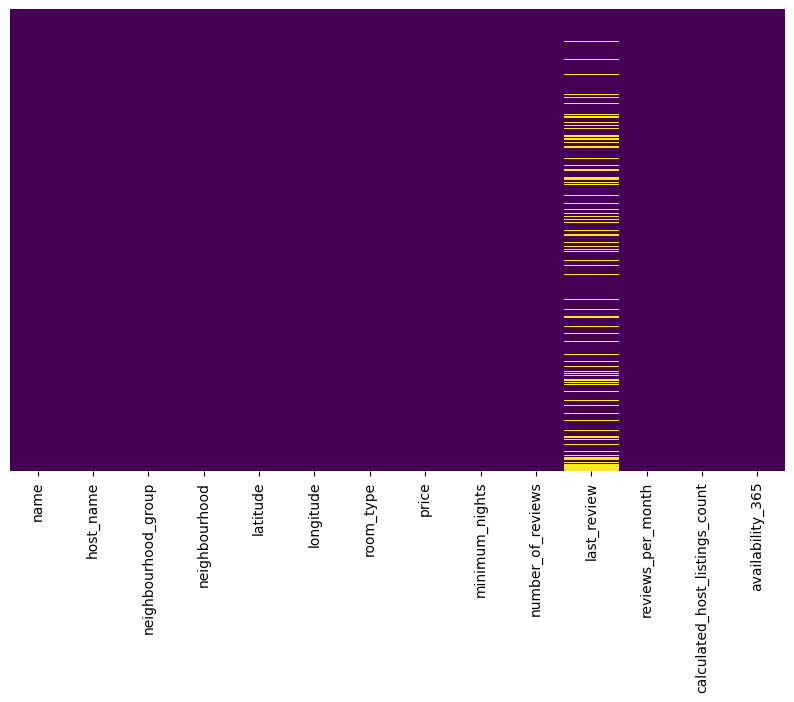

In [32]:
check_nan(airbnb)

In [33]:
# backward/forward fill, normalmente para series temporales
# asumiendo que las fechas están en orden (aqui NO tiene sentido)


airbnb.last_review.bfill()   # con el siguiente

airbnb.last_review.ffill() .head()   # con el anterior

0    2018-10-19
1    2019-05-21
2    2019-05-21
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

In [34]:
from datetime import datetime

datetime.today()

datetime.datetime(2023, 10, 19, 10, 8, 57, 559799)

In [35]:
#airbnb.drop('last_review', axis=1, inplace=True)

**para categorias, una estragia puede ser rellenar con el valor mas frecuente**

'N nan cols: 3'

name            0.030382
host_name       0.040509
last_review    19.411601
dtype: float64

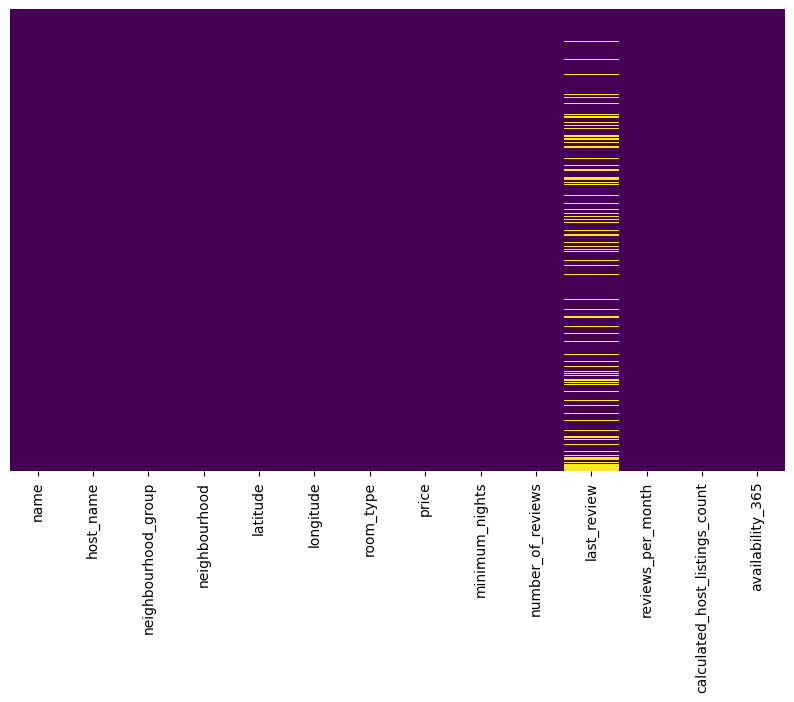

In [36]:
check_nan(airbnb)

## Datos inconsistentes 


**Fechas**

In [37]:
airbnb.last_review.head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

In [39]:
type(airbnb.last_review[0])

str

In [40]:
type(airbnb.last_review[2])

float

In [42]:
airbnb.last_review[0].split('-')

['2018', '10', '19']

In [43]:
np.nan.split('-')

AttributeError: 'float' object has no attribute 'split'

In [45]:
def limpiar(string):
    
    try:
        return string.split('-')
    
    except:
        return [np.nan, np.nan, np.nan]

In [46]:
limpiar('2019-54-54')

['2019', '54', '54']

In [47]:
limpiar(np.nan)

[nan, nan, nan]

In [48]:
lst = []

for e in airbnb.last_review:
    
    lst.append(limpiar(e))
    
    
lst[:2]

[['2018', '10', '19'], ['2019', '05', '21']]

In [50]:
airbnb['price'].head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [51]:
cols = ['price', 'name', 'last_review']

airbnb[cols].head()

,price,name,last_review
0,149,Clean & quiet apt home by the park,2018-10-19
1,225,Skylit Midtown Castle,2019-05-21
2,150,THE VILLAGE OF HARLEM....NEW YORK !,NaN
3,89,Cozy Entire Floor of Brownstone,2019-07-05
4,80,Entire Apt: Spacious Studio/Loft by central park,2018-11-19


In [49]:
airbnb[['year', 'month', 'day']] = [limpiar(e) for e in airbnb.last_review]

airbnb.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,NaN,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


In [52]:
airbnb['fecha'] = airbnb.day + '-' + airbnb.month + '-' + airbnb.year


airbnb.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,19-10-2018
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21,21-05-2019
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,NaN,NaN,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05,05-07-2019
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19,19-11-2018


In [59]:
airbnb.last_review = pd.to_datetime(airbnb.last_review, format='%Y-%m-%d')

pd.to_datetime(airbnb.fecha, format='%d-%m-%Y').head()

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: fecha, dtype: datetime64[ns]

In [61]:
type(airbnb.last_review[0])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
airbnb.sort_values(by='last_review', ascending=False).tail()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
48889,QUIT PRIVATE HOUSE,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaT,0.0,2,163,NaN,NaN,NaN,NaN
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.0,2,9,NaN,NaN,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.0,1,27,NaN,NaN,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.0,6,2,NaN,NaN,NaN,NaN
48894,Trendy duplex in the very heart of Hell's Kitchen,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,0.0,1,23,NaN,NaN,NaN,NaN


In [64]:
# asumimos que estan en orden

airbnb.last_review.ffill(inplace=True)

In [65]:
airbnb.fillna('0', inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

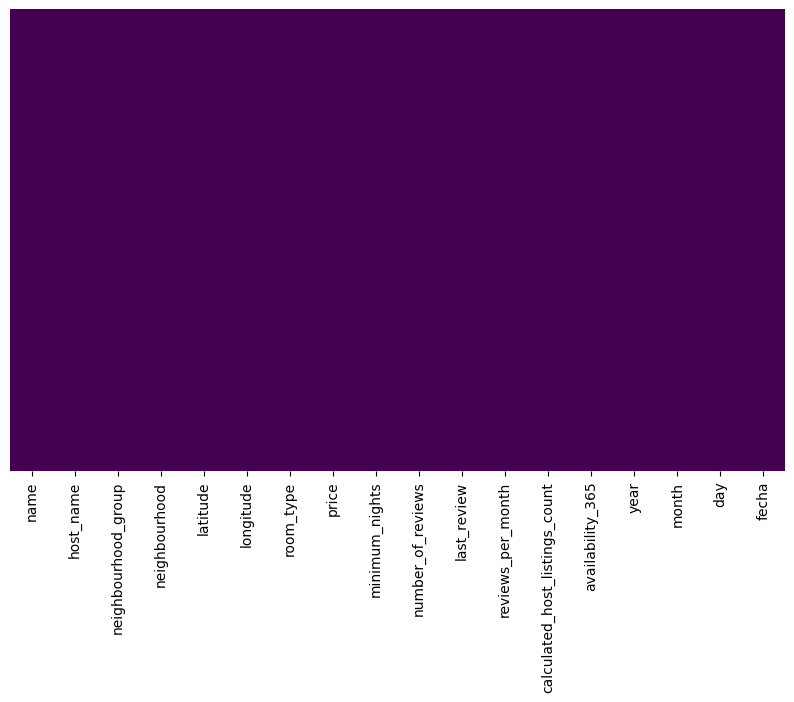

In [66]:
check_nan(airbnb)

**Arreglando errores en strings**

In [68]:
airbnb.neighbourhood_group.value_counts()

Manhattan        18568
Brooklyn         15866
Queens            4104
Bronx              698
Staten Island      261
Name: neighbourhood_group, dtype: int64

In [89]:
bad_index = airbnb.sample(2, random_state=42).index  # filas

mal_escrito = ['mahahatatahahaha', 'broboorororoororokkkkkkk']   # datos


airbnb.loc[bad_index, 'neighbourhood_group'] = mal_escrito

In [90]:
airbnb.loc[bad_index]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
4098,North Central Park Apartament,Radu,mahahatatahahaha,Harlem,40.80029,-73.95362,Entire home/apt,290,4,12,2019-07-07,0.2,1,359,2019,07,07,07-07-2019
18704,Spacious 2 bedroom penthouse in Williamsburg,Krzysztof,broboorororoororokkkkkkk,Greenpoint,40.72107,-73.94300,Entire home/apt,109,30,6,2018-08-10,0.2,8,176,2018,08,10,10-08-2018


In [91]:
airbnb.neighbourhood_group.value_counts()

Manhattan                   18567
Brooklyn                    15865
Queens                       4104
Bronx                         698
Staten Island                 261
mahahatatahahaha                1
broboorororoororokkkkkkk        1
Name: neighbourhood_group, dtype: int64

In [92]:
# df.columna.str podeis usar todos los metodos de strings que conoceis

airbnb.neighbourhood_group.str.replace('B', 'P').head()

0     Prooklyn
1    Manhattan
2    Manhattan
3     Prooklyn
4    Manhattan
Name: neighbourhood_group, dtype: object

In [95]:
airbnb.neighbourhood_group.replace(['B', 'mahahatatahahaha', 'broboorororoororokkkkkkk'], # lo que esta 
                                   ['P', 'Manhattan', 'Brooklyn'],   # lo que quiero
                                  inplace=True
                                  )

In [96]:
airbnb.neighbourhood_group.value_counts()

Manhattan        18568
Brooklyn         15866
Queens            4104
Bronx              698
Staten Island      261
Name: neighbourhood_group, dtype: int64

**ejemplo:** Busqueda de filas que contengan una palabra clave

In [99]:
airbnb[airbnb.neighbourhood_group.str.contains('Bro')].head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,19-10-2018
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05,05-07-2019
6,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2017,10,05,05-10-2017
12,"Lovely Room 1, Garden, Best Area, Legal rental",Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,2019,06,24,24-06-2019
15,Only 2 stops to Manhattan studio,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,2019,06,29,29-06-2019


In [100]:
airbnb.dropna(inplace=True)

In [102]:
# usando regex

patron = r'[Nn]oisy'

airbnb[airbnb.name.str.contains(patron, regex=True)].head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
23857,Small Homey Studio in a Big Noisy City,Alyssa,Manhattan,Harlem,40.81703,-73.93691,Entire home/apt,84,2,3,2017-06-28,0.12,1,0,2017,06,28,28-06-2017
35343,My wife is not used to the noisy environment. How,Jane,Manhattan,Financial District,40.70535,-74.01277,Entire home/apt,200,1,0,2019-06-17,0.00,1,0,0,0,0,0


In [110]:
airbnb[airbnb.name.str.contains('hola')]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
26252,Private cozy room- W 145st & Saint Nicholas Ave,Gustavo,Manhattan,Harlem,40.8233,-73.94461,Private room,65,1,26,2018-05-12,1.18,1,0,2018,05,12,12-05-2018


In [104]:
# del df que tiene 'sweet' en la columna 'name' y que no sea ruidoso, dame el 'price'


airbnb[(airbnb.name.str.contains('sweet')) & ~(airbnb.name.str.contains(patron, regex=True))].head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,fecha
7026,"Simple, sweet in NOLITA-NYC",Alexa,Manhattan,Chinatown,40.71848,-73.99549,Private room,80,3,153,2019-06-25,2.90,1,238,2019,06,25,25-06-2019
9298,"Charming , sweet , and cozy Manhattan apartment.",Alexis,Manhattan,Upper East Side,40.76533,-73.96163,Entire home/apt,270,4,44,2019-07-02,0.92,1,335,2019,07,02,02-07-2019
9474,Park Slope sweet cozy home! Wifi!,Ming,Brooklyn,Park Slope,40.67560,-73.97781,Private room,89,5,102,2019-06-19,2.17,1,255,2019,06,19,19-06-2019
10556,"home, sweet home :-) English, русский, עברית",Irisha,Queens,Fresh Meadows,40.74267,-73.78737,Entire home/apt,100,1,59,2019-06-09,1.58,3,132,2019,06,09,09-06-2019
11806,"Homie,cozy,artsy,warm,sweet,Harlem!",Hannah,Manhattan,Harlem,40.81344,-73.95007,Entire home/apt,85,1,0,2019-06-21,0.00,1,0,0,0,0,0


In [105]:
# comprobar duplicados

airbnb.duplicated().any()  # ¿hay alguno?, si True sí, entonces drop_duplicates()

False

**Cambio del tipo de dato, optimizacion de memoria**

In [111]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39497 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            39497 non-null  object        
 1   host_name                       39497 non-null  object        
 2   neighbourhood_group             39497 non-null  object        
 3   neighbourhood                   39497 non-null  object        
 4   latitude                        39497 non-null  float64       
 5   longitude                       39497 non-null  float64       
 6   room_type                       39497 non-null  object        
 7   price                           39497 non-null  int64         
 8   minimum_nights                  39497 non-null  int64         
 9   number_of_reviews               39497 non-null  int64         
 10  last_review                     39497 non-null  datetime64[ns]
 11  re

In [112]:
for c in airbnb:
    print(c)

name
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
year
month
day
fecha


In [118]:
for c in airbnb.select_dtypes(include='object'):
    
    airbnb[c] = airbnb[c].astype('category') # cambia el tipo a categoria
    
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39497 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            39497 non-null  category      
 1   host_name                       39497 non-null  category      
 2   neighbourhood_group             39497 non-null  category      
 3   neighbourhood                   39497 non-null  category      
 4   latitude                        39497 non-null  float64       
 5   longitude                       39497 non-null  float64       
 6   room_type                       39497 non-null  category      
 7   price                           39497 non-null  int64         
 8   minimum_nights                  39497 non-null  int64         
 9   number_of_reviews               39497 non-null  int64         
 10  last_review                     39497 non-null  datetime64[ns]
 11  re

In [119]:
airbnb.loc[0, 'name'] #= 'hola que tal'

'hola que tal'

In [ ]:
for c in airbnb.select_dtypes('category'):
    
    airbnb[c]=airbnb[c].astype('object')
    
airbnb.info(memory_usage='deep')

In [ ]:
for c in airbnb.select_dtypes(include='object'):
    
    airbnb[c]=airbnb[c].astype('category')
 
airbnb.info(memory_usage='deep')

In [120]:
for c in airbnb.select_dtypes(include='integer'):
    
    airbnb[c]=pd.to_numeric(airbnb[c], downcast='integer')
 
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39497 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            39497 non-null  category      
 1   host_name                       39497 non-null  category      
 2   neighbourhood_group             39497 non-null  category      
 3   neighbourhood                   39497 non-null  category      
 4   latitude                        39497 non-null  float64       
 5   longitude                       39497 non-null  float64       
 6   room_type                       39497 non-null  category      
 7   price                           39497 non-null  int16         
 8   minimum_nights                  39497 non-null  int16         
 9   number_of_reviews               39497 non-null  int16         
 10  last_review                     39497 non-null  datetime64[ns]
 11  re

In [121]:
for c in airbnb.select_dtypes(include='float'):
    
    airbnb[c]=pd.to_numeric(airbnb[c], downcast='float')
 
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39497 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            39497 non-null  category      
 1   host_name                       39497 non-null  category      
 2   neighbourhood_group             39497 non-null  category      
 3   neighbourhood                   39497 non-null  category      
 4   latitude                        39497 non-null  float32       
 5   longitude                       39497 non-null  float32       
 6   room_type                       39497 non-null  category      
 7   price                           39497 non-null  int16         
 8   minimum_nights                  39497 non-null  int16         
 9   number_of_reviews               39497 non-null  int16         
 10  last_review                     39497 non-null  datetime64[ns]
 11  re

In [123]:
print(airbnb.latitude[0])

40.64749


In [124]:
for c in airbnb.select_dtypes(include='datetime64[ns]'):
    
    airbnb[c]=airbnb[c].astype('datetime64[s]')
 
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39497 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            39497 non-null  category      
 1   host_name                       39497 non-null  category      
 2   neighbourhood_group             39497 non-null  category      
 3   neighbourhood                   39497 non-null  category      
 4   latitude                        39497 non-null  float32       
 5   longitude                       39497 non-null  float32       
 6   room_type                       39497 non-null  category      
 7   price                           39497 non-null  int16         
 8   minimum_nights                  39497 non-null  int16         
 9   number_of_reviews               39497 non-null  int16         
 10  last_review                     39497 non-null  datetime64[ns]
 11  re

## Outliers

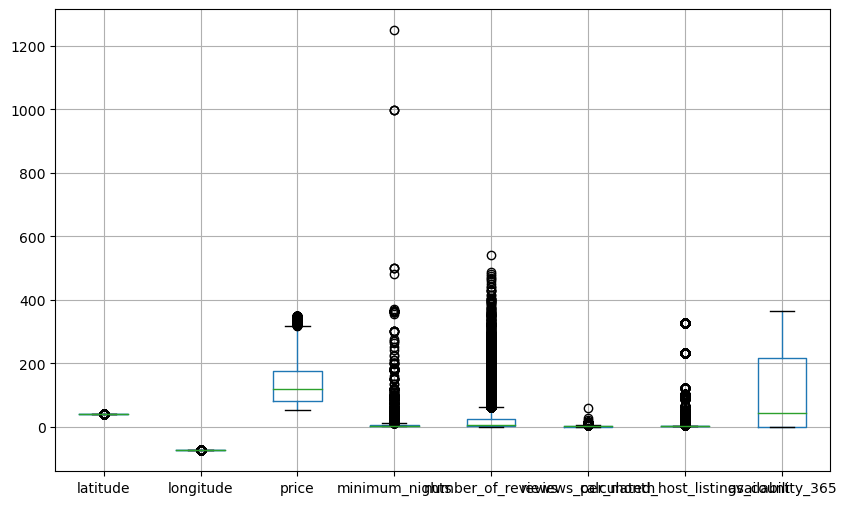

In [125]:
plt.figure(figsize=(10, 6))

airbnb.boxplot();

In [127]:
stats = airbnb.describe().T

stats['IQR'] = stats['75%'] - stats['25%']

#test de Tukey
stats['IQR1.5'] = 1.5 * stats['IQR'] + stats['75%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
latitude,39497.0,40.730118,0.053065,40.499790,40.691689,40.724701,40.763802,40.908039,0.072113,40.871971
longitude,39497.0,-73.954834,0.046306,-74.244423,-73.984108,-73.957451,-73.940071,-73.712990,0.044037,-73.874016
price,39497.0,133.705167,66.036012,51.000000,80.000000,119.000000,175.000000,349.000000,95.000000,317.500000
minimum_nights,39497.0,6.841279,20.221095,1.000000,1.000000,2.000000,5.000000,1250.000000,4.000000,11.000000
number_of_reviews,39497.0,24.612325,45.558459,0.000000,1.000000,6.000000,25.000000,540.000000,24.000000,61.000000
reviews_per_month,39497.0,1.111808,1.593382,0.000000,0.050000,0.390000,1.650000,58.500000,1.600000,4.050000
calculated_host_listings_count,39497.0,7.030078,33.250478,1.000000,1.000000,1.000000,2.000000,327.000000,1.000000,3.500000
availability_365,39497.0,109.965694,130.059870,0.000000,0.000000,42.000000,217.000000,365.000000,217.000000,542.500000


**depende del contexto**

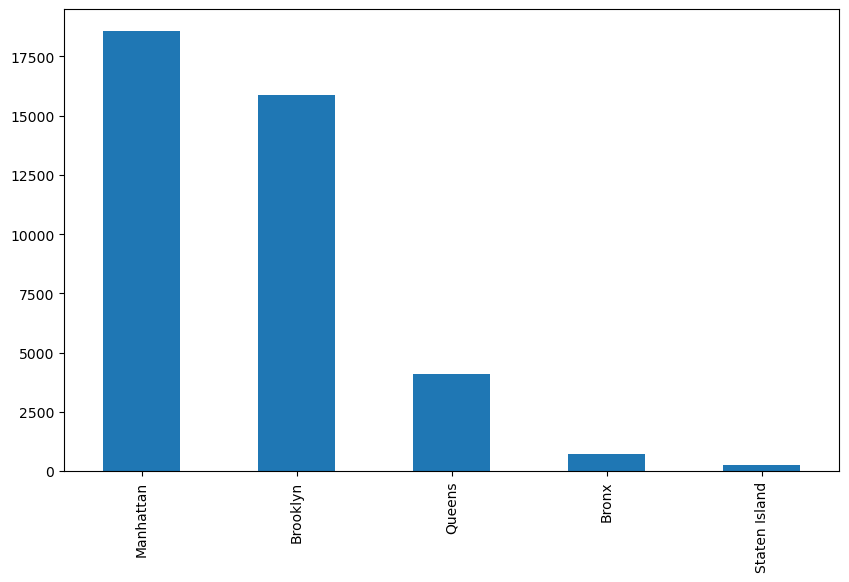

In [129]:
plt.figure(figsize=(10, 6))

airbnb.neighbourhood_group.value_counts().plot.bar();

In [130]:
airbnb_ori.shape

(48895, 16)

In [131]:
airbnb.shape

(39497, 18)

# Ejemplo 2 - House Data


**Cargamos los datos**

In [132]:
df_ori = pd.read_csv('../data/sberbank.csv')

df = df_ori.copy()

df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

**Analisis inicial**

In [133]:
df.shape

(30471, 292)

In [134]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 92.6 MB


In [136]:
df.describe(include='all').T.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30471.0,NaN,NaN,NaN,15237.917397,8796.501536,1.0,7620.5,15238.0,22855.5,30473.0
timestamp,30471,1161,2014-12-16,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_sq,30471.0,NaN,NaN,NaN,54.214269,38.031487,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,NaN,NaN,NaN,34.403271,52.285733,0.0,20.0,30.0,43.0,7478.0
floor,30304.0,NaN,NaN,NaN,7.670803,5.319989,0.0,3.0,6.5,11.0,77.0


## Valores Nulos

'N nan cols: 51'

life_sq                                  20.947786
floor                                     0.548062
max_floor                                31.413475
material                                 31.413475
build_year                               44.649011
num_room                                 31.413475
kitch_sq                                 31.413475
state                                    44.498047
preschool_quota                          21.948738
school_quota                             21.938893
hospital_beds_raion                      47.392603
raion_build_count_with_material_info     16.379508
build_count_block                        16.379508
build_count_wood                         16.379508
build_count_frame                        16.379508
build_count_brick                        16.379508
build_count_monolith                     16.379508
build_count_panel                        16.379508
build_count_foam                         16.379508
build_count_slag               

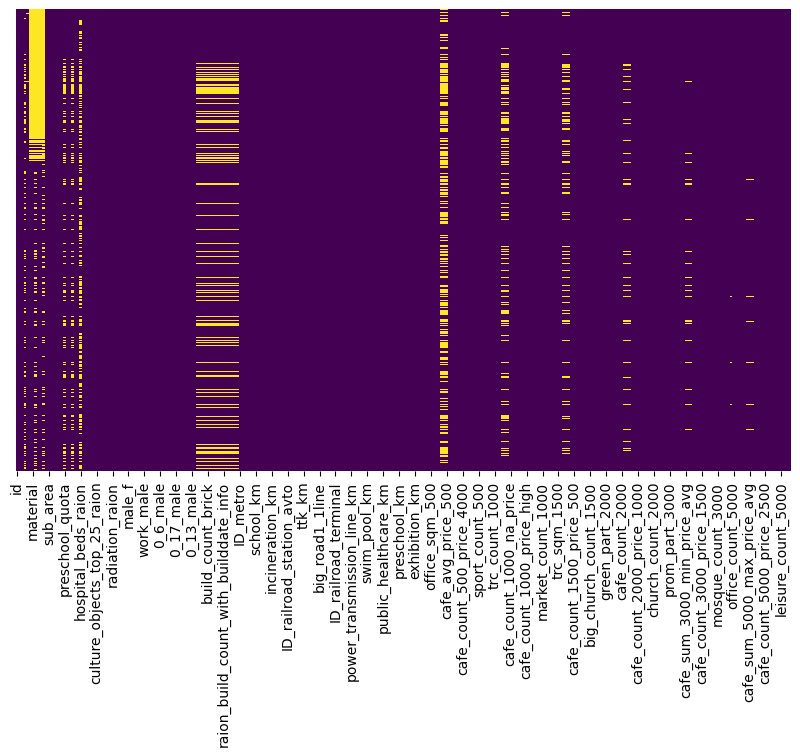

None


In [138]:
print(check_nan(df))

In [139]:
# umbral del 20%, columnas con más de 20% de nulos fuera


nan_cols = df.isna().mean() * 100


nan_cols[nan_cols>20]

life_sq                        20.947786
max_floor                      31.413475
material                       31.413475
build_year                     44.649011
num_room                       31.413475
kitch_sq                       31.413475
state                          44.498047
preschool_quota                21.948738
school_quota                   21.938893
hospital_beds_raion            47.392603
cafe_sum_500_min_price_avg     43.585704
cafe_sum_500_max_price_avg     43.585704
cafe_avg_price_500             43.585704
cafe_sum_1000_min_price_avg    21.410521
cafe_sum_1000_max_price_avg    21.410521
cafe_avg_price_1000            21.410521
dtype: float64

In [140]:
df = df.drop(columns = nan_cols[nan_cols>20].index)

'N nan cols: 35'

floor                                     0.548062
raion_build_count_with_material_info     16.379508
build_count_block                        16.379508
build_count_wood                         16.379508
build_count_frame                        16.379508
build_count_brick                        16.379508
build_count_monolith                     16.379508
build_count_panel                        16.379508
build_count_foam                         16.379508
build_count_slag                         16.379508
build_count_mix                          16.379508
raion_build_count_with_builddate_info    16.379508
build_count_before_1920                  16.379508
build_count_1921-1945                    16.379508
build_count_1946-1970                    16.379508
build_count_1971-1995                    16.379508
build_count_after_1995                   16.379508
metro_min_walk                            0.082045
metro_km_walk                             0.082045
railroad_station_walk_km       

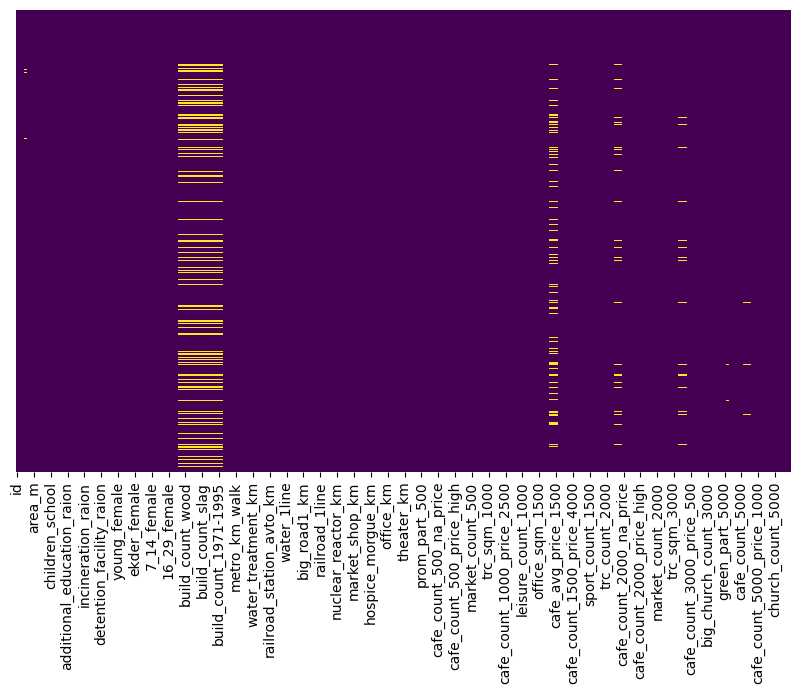

In [141]:
check_nan(df)

In [147]:
# desglosado

num_nan = []


for fila in df.itertuples():
    
    check = []
    
    for e in fila:
        check.append(pd.isna(e))
        
    num_nan.append(sum(check))
    
    
num_nan[:5]

[0, 0, 0, 0, 0]

In [148]:
max(num_nan)

29

In [149]:
pd.isna(np.nan)

True

In [150]:
df['num_nan'] = [sum([pd.isna(e) for e in fila]) for fila in df.itertuples()]


df.head()

,id,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count

In [152]:
df[df.num_nan>=10].shape

(5139, 277)

In [153]:
df.shape

(30471, 277)

'N nan cols: 35'

floor                                     0.934034
raion_build_count_with_material_info     97.120062
build_count_block                        97.120062
build_count_wood                         97.120062
build_count_frame                        97.120062
build_count_brick                        97.120062
build_count_monolith                     97.120062
build_count_panel                        97.120062
build_count_foam                         97.120062
build_count_slag                         97.120062
build_count_mix                          97.120062
raion_build_count_with_builddate_info    97.120062
build_count_before_1920                  97.120062
build_count_1921-1945                    97.120062
build_count_1946-1970                    97.120062
build_count_1971-1995                    97.120062
build_count_after_1995                   97.120062
metro_min_walk                            0.058377
metro_km_walk                             0.058377
railroad_station_walk_km       

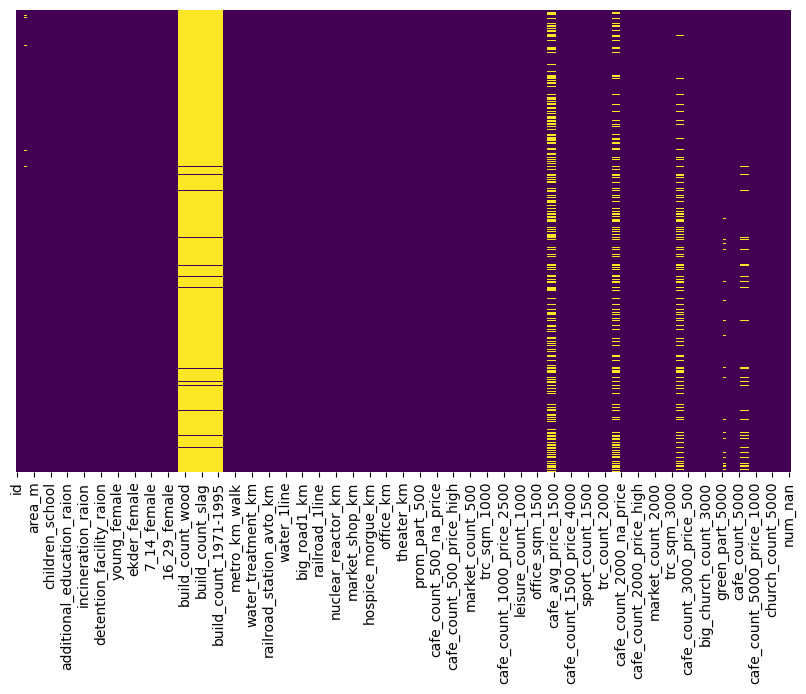

In [154]:
check_nan(df[df.num_nan>=10])

In [155]:
# borro filas que tengan mas de 10 nulos


df = df[df.num_nan<10]

df.shape

(25332, 277)

'N nan cols: 15'

floor                          0.469762
metro_min_walk                 0.086847
metro_km_walk                  0.086847
railroad_station_walk_km       0.086847
railroad_station_walk_min      0.086847
ID_railroad_station_walk       0.086847
cafe_sum_1500_min_price_avg    8.337281
cafe_sum_1500_max_price_avg    8.337281
cafe_avg_price_1500            8.337281
cafe_sum_2000_min_price_avg    1.871151
cafe_sum_2000_max_price_avg    1.871151
cafe_avg_price_2000            1.871151
cafe_sum_3000_min_price_avg    0.078952
cafe_sum_3000_max_price_avg    0.078952
cafe_avg_price_3000            0.078952
dtype: float64

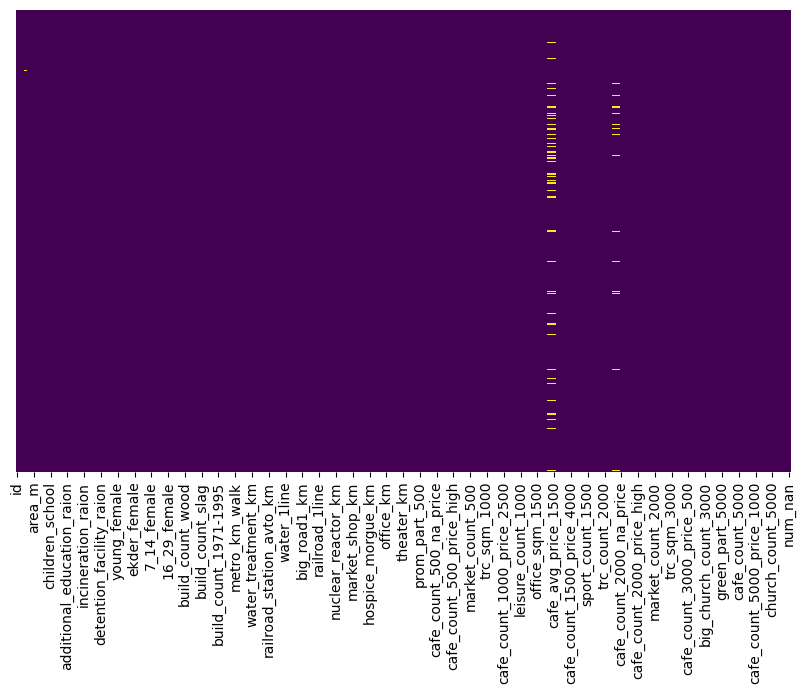

In [156]:
check_nan(df)

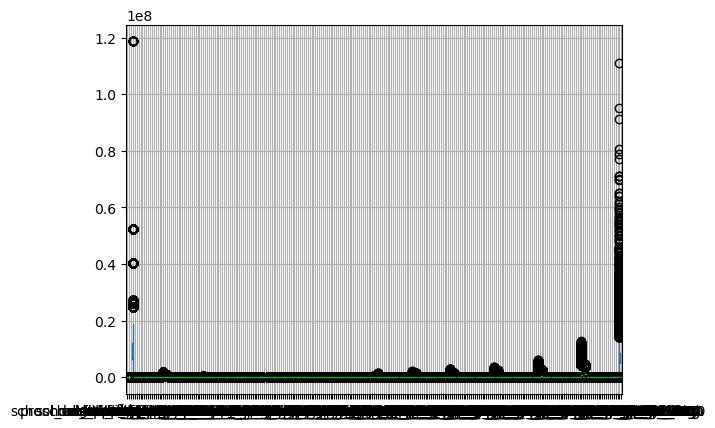

In [157]:
df.boxplot();

In [159]:
df.fillna(df.median(), inplace=True)

In [160]:
df.shape

(25332, 277)

In [161]:
df_ori.shape

(30471, 292)

'N nan cols: 0'

Series([], dtype: float64)

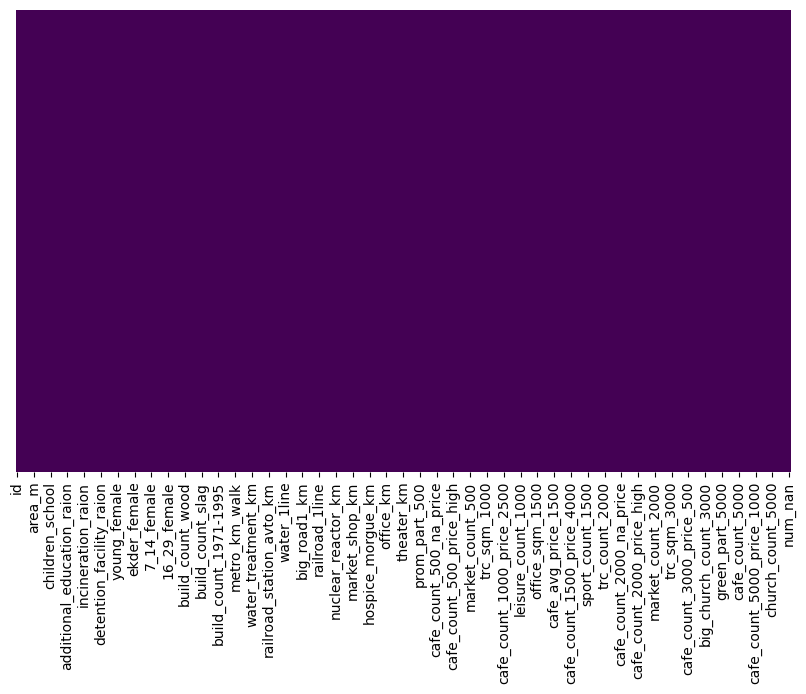

In [162]:
check_nan(df)